In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['xtick.color'] = '#A9A9A9'
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.color'] = '#A9A9A9'

mpl.rcParams['grid.color'] = '#ffffff'

mpl.rcParams['axes.facecolor'] = '#ffffff'

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



Span, Linear Dependency, and Space Transformation
=================================================

As you saw in Section 5 and
Section 6, being able to
manipulate vectors and matrices is critical to create machine learning
and deep learning pipelines, for instance for reshaping your raw data
before using it with machine learning libraries.

The goal of this chapter is to get you to the next level of
understanding of vectors and matrices. You’ll start seeing matrices, not
only as operations on numbers, but also as a way to transform vector
spaces. This conception will give you the foundations needed to
understand more complex linear algebra concepts like matrix
decomposition. You’ll build up on what you learned about vector addition
and scalar multiplication to understand linear combinations of vectors.
You will also see subspace, span, linear dependency, that are major
concepts of linear algebra used in machine learning and data science.

7.1 Linear Transformations
--------------------------

### 7.1.1 Intuition

A *linear transformation* (or simply *transformation*, sometimes called
*linear map*) is a mapping between two vector spaces: it takes a vector
as input and *transforms* it into a new output vector. A function is
said to be linear if the properties of additivity and scalar
multiplication are preserved, that is, the same result is obtained if
these operations are done before or after the transformation. Linear
functions are synonymously called linear transformations.

You can encounter the following notation to describe a linear
transformation: $T(\vv)$. This refers to the vector $\vv$ transformed by
$T$. A transformation $T$ is associated with a specific matrix. Since
additivity and scalar multiplication must be preserved in linear
transformation, you can write:

$$
\tT(\vv+\vw) = \tT(\vv) + \tT(\vw)
$$

and

$$
\tT(c\vv) = c\tT(\vv)
$$

### 7.1.2 Linear Transformations as Vectors and Matrices

In linear algebra, the information concerning a linear transformation
can be represented as a matrix. Moreover, every linear transformation
can be expressed as a matrix (gilbert Strang. Introduction to Linear
Algebra, Fifth Edition. Wellesley, MA: Wellesley-Cambridge Press, 2016.,
p. 413) .

When you do the linear transformation associated with a matrix, we say
that you *apply* the matrix to the vector. More concretely, it means
that you calculate the matrix-vector product of the matrix and the
vector. In this case, the matrix can sometimes be called a
*transformation matrix*. For instance, you can apply a matrix $\mA$ to a
vector $\vv$ with their product $\mA \vv$.

Keep in mind that, to apply a matrix to a vector, you *left multiply*
the vector by the matrix: the matrix is on the left to the vector.

When you multiply multiple matrices, the corresponding linear
transformations are combined in the order from right to left.

For instance, let’s say that a matrix $\mA$ does a 45-degree clockwise
rotation and a matrix $\mB$ does a stretching, the product $\mB \mA$
means that you first do the rotation and then the stretching.

This shows that the matrix product is:

-   Not commutative ($\mA\mB \neq \mB\mA$): the stretching then the
    rotation is a different transformation than the rotation then the
    stretching.
-   Associative ($\mA(\mB\mC)) = ((\mA\mB)\mC$): the same
    transformations associated with the matrices $\mA$, $\mB$ and $\mC$
    are done in the same order.

A matrix-vector product can thus be considered as a way to transform a
vector. You saw in
Section 6.3 that the
shape of $\mA$ and $\vv$ must match for the product to be possible.

### 7.1.3 Geometric Interpretation

A good way to understand the relationship between matrices and linear
transformations is to actually visualize these transformations. To do
that, you’ll use a grid of points in a two-dimensional space, each point
corresponding to a vector (it is easier to visualize points instead of
arrows pointing from the origin).

Let’s start by creating the grid using the function `meshgrid()` from
Numpy:

In [2]:
x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

xx, yy = np.meshgrid(x, y)

The `meshgrid()` function allows you to create all combinations of
points from the arrays `x` and `y`. Let’s plot the scatter plot
corresponding to `xx` and `yy`.

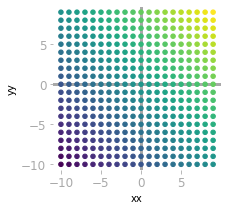

In [3]:

plt.figure(figsize=(3, 3))

plt.scatter(xx, yy, s=20, c=xx+yy)
# [...] Add axis, x and y witht the same scale

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#A9A9A9', zorder=0)
plt.axvline(0, c='#A9A9A9', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')
plt.xlabel('xx')
plt.ylabel('yy')
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 112: Each point corresponds to the combination of x and y values.</figcaption>
</figure>

You can see the grid in Figure [112](#fig:ch08_output_grid). The color
corresponds to the addition of `xx` and `yy` values. This will make
transformations easier to visualize.

#### The Linear Transformation associated with a Matrix

As a first example, let’s visualize the transformation associated with
the following two-dimensional square matrix.

$$
\mT = \begin{bmatrix}
    -1 & 0 \\\\
    0 & -1
\end{bmatrix}
$$

Consider that each point of the grid is a vector defined by two
coordinates ($x$ and $y$).

Let’s create the transformation matrix $\mT$:

In [4]:
T = np.array([
    [-1, 0],
    [0, -1]
])

First, you need to structure the points of the grid to be able to apply
the matrix to each of them. For now, you have two 20 by 20 matrices
(`xx` and `yy`) corresponding to $20 \cdot 20 = 400$ points, each having
a $x$ value (matrix `xx`) and a $y$ value (`yy`). Let’s create a 2 by
400 matrix with `xx` flatten as the first column and `yy` as the second
column.

In [5]:
xy =  np.vstack([xx.flatten(), yy.flatten()])
xy.shape

(2, 400)

You have now 400 points, each with two coordinates. Let’s apply the
transformation matrix $\mT$ to the first two-dimensional point
(`xy[:, 0]`), for instance:

In [6]:
T @ xy[:, 0]

array([10, 10])

You can similarly apply $\mT$ to each point by calculating its product
with the matrix containing all points:

In [7]:
trans = T @ xy
trans.shape


(2, 400)

You can see that the shape is still $(2, 400)$. Each transformed vector
(that is, each point of the grid) is one of the column of this new
matrix. Now, let’s reshape this array to have two arrays with a similar
shape to `xx` and `yy`.

In [8]:
xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)

Let’s plot the grid before and after the transformation:

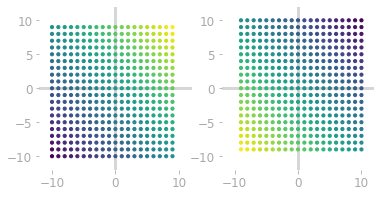

In [9]:
f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
# [...] Add axis, x and y witht the same scale

# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-12, 12)
axes[0].set_ylim(-12, 12)

axes[1].set_xlim(-12, 12)
axes[1].set_ylim(-12, 12)
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 113: The grid of points before (left) and after (right) its transformation by the matrix <span class="math inline">$\mT$</span>.</figcaption>
</figure>

Figure [113](#fig:ch08_output_grid_rotation) shows that the matrix $\mT$
rotated the points of the grid.

#### Shapes of the Input and Output Vectors

In the previous example, the output vectors have the same number of
dimensions than the input vectors (two dimensions).

You might notice that the shape of the transformation matrix must match
the shape of the vectors you want to transform.

<figure>
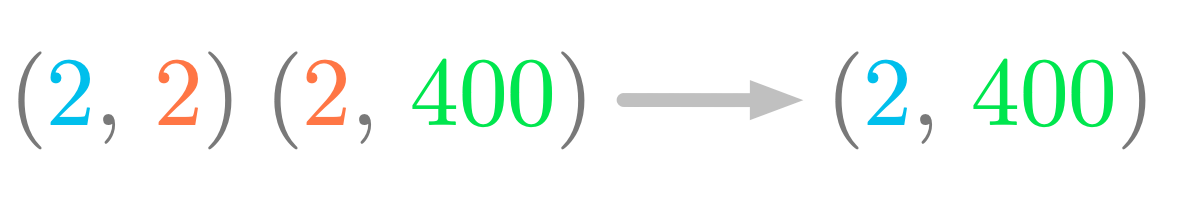<figcaption aria-hidden="true">Figure 114: Shape of the transformation of the grid points by <span class="math inline">$\mT$</span>.</figcaption>
</figure>

Figure [114](#fig:ch08_shape_rotation_transformation) illustrates the
shapes of this example. The first matrix with a shape (2, 2) is the
transformation matrix $\mT$ and the second matrix with a shape (2, 400)
corresponds to the 400 vectors stacked. As illustrated in blue, the
number of rows of the $\mT$ corresponds to the number of dimensions of
the output vectors. As illustrated in red, the transformation matrix
must have the same number of columns than the number of dimensions of
the matrix you want to transform.

More generally, the size of the transformation matrix tells you the
input and output dimensions. A $m$ by $n$ transformation matrix
transforms $n$-dimensional vectors to $m$-dimensional vectors.

#### Stretching and Rotation

Let’s now visualize the transformation associated with the following
matrix:

$$
\mT = \begin{bmatrix}
    1.3 & -2.4 \\\\
    0.1 & 2
\end{bmatrix}
$$

Let’s proceed as in the previous example:

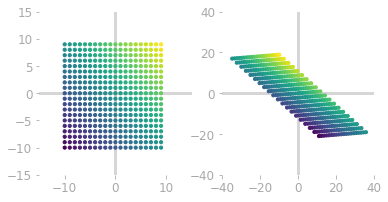

In [10]:
T = np.array([
    [1.3, -2.4],
    [0.1, 2]
])
trans = T @ xy

xx_transformed = trans[0].reshape(xx.shape)
yy_transformed = trans[1].reshape(yy.shape)

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
# [...] Add axis, x and y witht the same scale

# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)

axes[1].set_xlim(-40, 40)
axes[1].set_ylim(-40, 40)
plt.show()



<figure>
<figcaption aria-hidden="true">Figure 115: The grid of points before (left) and after (right) the transformation by the new matrix <span class="math inline">$\mT$</span>.</figcaption>
</figure>

Figure [115](#fig:ch08_output_complicated_transformation) shows that the
transformation is different from the previous rotation. This time, there
is a rotation, but also a stretching of the space.

You might wonder why these transformations are called “linear”. You saw
that a linear transformation implies that the properties of additivity
and scalar multiplication are preserved.

Geometrically, there is linearity if the vectors lying on the same line
in the input space are also on the same line in the output space, and if
the origin remains at the same location.

### 7.1.4 Special Cases

#### Inverse Matrices

Transforming the space with a matrix can be reversed if the matrix is
invertible. In this case, the inverse $\mT^{-1}$ of the matrix $\mT$ is
associated to a transformation that takes back the space to the initial
state after $\mT$ has been applied.

Let’s take again the example of the transformation associated with the
following matrix:

$$
\mT = \begin{bmatrix}
    1.3 & -2.4 \\\\
    0.1 & 2
\end{bmatrix}
$$

You’ll plot the initial grid of point, the grid after being transformed
by $\mT$, and the grid after successive application of $\mT$ and
$\mT^{-1}$ (remember that matrices must be left-multiplied):

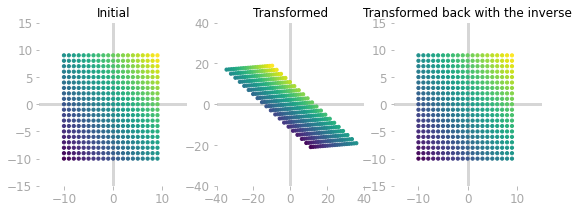

In [11]:
T = np.array([
    [1.3, -2.4],
    [0.1, 2]
])
trans = T @ xy

T_inv = np.linalg.inv(T)

un_trans = T_inv @ T @ xy 

f, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)
axes[2].scatter(un_trans[0].reshape(xx.shape), un_trans[1].reshape(yy.shape), s=10, c=xx+yy)

# [...] Add axis, x and y witht the same scale

# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)
axes[2].axhline(0, c='#d6d6d6', zorder=0)
axes[2].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)
axes[0].set_title("Initial")

axes[1].set_xlim(-40, 40)
axes[1].set_ylim(-40, 40)
axes[1].set_title("Transformed")

axes[2].set_xlim(-15, 15)
axes[2].set_ylim(-15, 15)
axes[2].set_title("Transformed back with the inverse")
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 116: Inverse of a transformation: the initial space (left) is transformed with the matrix <span class="math inline">$\mT$</span> (middle) and transformed back using <span class="math inline">$\mT^{-1}$</span> (right).</figcaption>
</figure>

As you can see in Figure [116](#fig:ch08_output_inverse_transformation),
the inverse $\mT^{-1}$ of the matrix $\mT$ is associated with a
transformation that reverses the one associated with $\mT$.

Mathematically, the transformation of a vector $\vv$ by $\mT$ is defined
as:

$$
\mT \vv
$$

To transform it back, you multiply by the inverse of $\mT$:

$$
\mT^{-1}  \mT \vv
$$

Note that the order of the products is from right to left. The vector on
the right of the product is first transformed by $\mT$ and then the
result is transformed by $\mT^{-1}$.

Since you saw in Section 6.4.4
that $\mT^{-1} \mT = \mI$, you have:

$$
\mT^{-1}  \mT \vv = \mI \vv = \vv
$$

meaning that you get back the initial vector $\vv$.

#### Non Invertible Matrices

The linear transformation associated with a singular matrix (that is a
non invertible matrix, see more details in
Section 6.4.4) can’t be reversed.
It can occur when there is a loss of information with the
transformation. Take the following matrix:

$$
\mT = \begin{bmatrix}
    3 & 6 \\\\
    2 & 4
\end{bmatrix}
$$

Let’s see how it transforms the space:

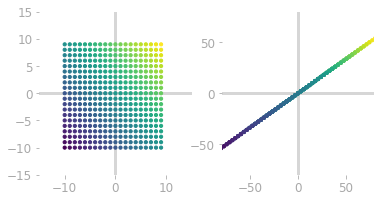

In [12]:
T = np.array([
    [3, 6],
    [2, 4],
])
trans = T @ xy

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)
# [...] Add axis, x and y witht the same scale

# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 15)

axes[1].set_xlim(-80, 80)
axes[1].set_ylim(-80, 80)
plt.show()



<figure>
<figcaption aria-hidden="true">Figure 117: The initial space (left) is transformed into a line (right) with the matrix <span class="math inline">$\mT$</span>. Multiple input vectors land on the same location in the output space.</figcaption>
</figure>

You can see in Figure [117](#fig:ch08_output_singular_transformation)
that the transformed vectors are on a line. There are points that land
on the same place after the transformation. Thus, it is not possible to
go back. In this case, the matrix $\mT$ is not invertible: it is
singular.

7.2 Linear combination
----------------------

### 7.2.1 Intuition

Adding and multiplying vectors by scalars are two major operations in
linear algebra. You saw that they must be preserved for a transformation
to be called linear. The *linear combination* of two vectors corresponds
to the addition of a scaled version of these vector.

Let’s take an example with the following vectors $\vu$ and $\vv$:

$$
\vu = \begin{bmatrix}
    2 \\\\
    3
\end{bmatrix}
$$

and

$$
\vv = \begin{bmatrix}
    3 \\\\
    -1
\end{bmatrix}
$$

For instance, the operation $3\vu + 4\vv$ is called a linear combination
of the two vectors $\vu$ and $\vv$. The values that scale each vector
are sometimes called the *weights*. The linear combination of two
vectors returns a new vector. Algebraically, you can calculate this
linear combination as following:

$$
3\vu + 4\vv =
3 \begin{bmatrix}
    2 \\\\
    3
\end{bmatrix}
+ 4
\begin{bmatrix}
    3 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    3 \cdot 2 \\\\
    3 \cdot 3
\end{bmatrix}
+ \begin{bmatrix}
    4 \cdot 3 \\\\
    4 \cdot -1
\end{bmatrix}
= \begin{bmatrix}
    6 + 12 \\\\
    9 - 4
\end{bmatrix}
= \begin{bmatrix}
    18 \\\\
    5
\end{bmatrix}
$$

The linear combination of $\vu$ and $\vv$ gives you a new vector (18,
5).

#### Matrix as Column Vectors

Another way to express a linear combination is to store the vectors in a
matrix and the weights in a vector.

From the previous example, you can have a matrix $\mA$ containing the
two vectors $\vu$ and $\vv$:

$$
\mA = \begin{bmatrix}
    2 & 3 \\\\
    3 & -1
\end{bmatrix}
$$

The linear combination can be expressed as the product of the matrix
$\mA$ and the weights applied to these vectors. You would have:

$$
\mA \cdot
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}
= \begin{bmatrix}
    2 & 3 \\\\
    3 & -1
\end{bmatrix}
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}
= \begin{bmatrix}
    2 \cdot 3 + 3 \cdot 4 \\\\
    3 \cdot 3 + (-1) \cdot 4
\end{bmatrix}
= \begin{bmatrix}
    18 \\\\
    5
\end{bmatrix}
$$

In this perspective, the matrix-vector product corresponds to a linear
combination of the matrix columns. The matrix $\mA$ contains two column
vectors and the vector contains weights.

#### More than Two Dimensions

The preceding examples used vectors with two components ($\evv_x$ and
$\evv_y$). However, linear combinations can be done with vectors with
more components (higher dimensions).

Let’s take an example with the following three-dimensional vectors $\vu$
and $\vv$:

$$
\vu = \begin{bmatrix}
    1 \\\\
    3 \\\\
    -1
\end{bmatrix}
$$

and

$$
\vv = \begin{bmatrix}
    -2 \\\\
    0 \\\\
    1
\end{bmatrix}
$$

For example, $-2\vu + 3\vv$ is a linear combination of $\vu$ and $\vv$,
and is calculated as following:

$$
-2\vu + 3\vv
= 
-2\begin{bmatrix}
    1 \\\\
    3 \\\\
    -1
\end{bmatrix} +
3\begin{bmatrix}
    -2 \\\\
    0 \\\\
    1
\end{bmatrix}
= \begin{bmatrix}
    -2 \\\\
    -6 \\\\
    2
\end{bmatrix}
+ \begin{bmatrix}
    -6 \\\\
    0 \\\\
    3
\end{bmatrix}
= \begin{bmatrix}
    -2 - 6 \\\\
    -6 + 0 \\\\
    2 + 3
\end{bmatrix}
= \begin{bmatrix}
    -8 \\\\
    -6 \\\\
    5
\end{bmatrix}
$$

You can see that the idea is the same: these concepts work for a larger
number of dimensions.

### 7.2.2 All combinations of vectors

You have seen examples of specific combinations of vectors like
$-2\vv + 3\vw$. You take two vectors and their linear combination
results in a third vector. The next step is to think about all the
possible combinations for a set of vectors.

#### One Vector

Let’s start with a single vector $\vu$. You can define linear
combinations of this vector as:

$$
a\vu
$$

The vector $\vu$ is weighted by a scalar $a$. If you represent the
vector $\vu$ geometrically, $a\vu$ corresponds to a rescaling of $\vu$.
For this reason, all the combinations of the single vector $\vu$
corresponds to all possible scalings of $\vu$ (all possible values of
$a$).

<figure>
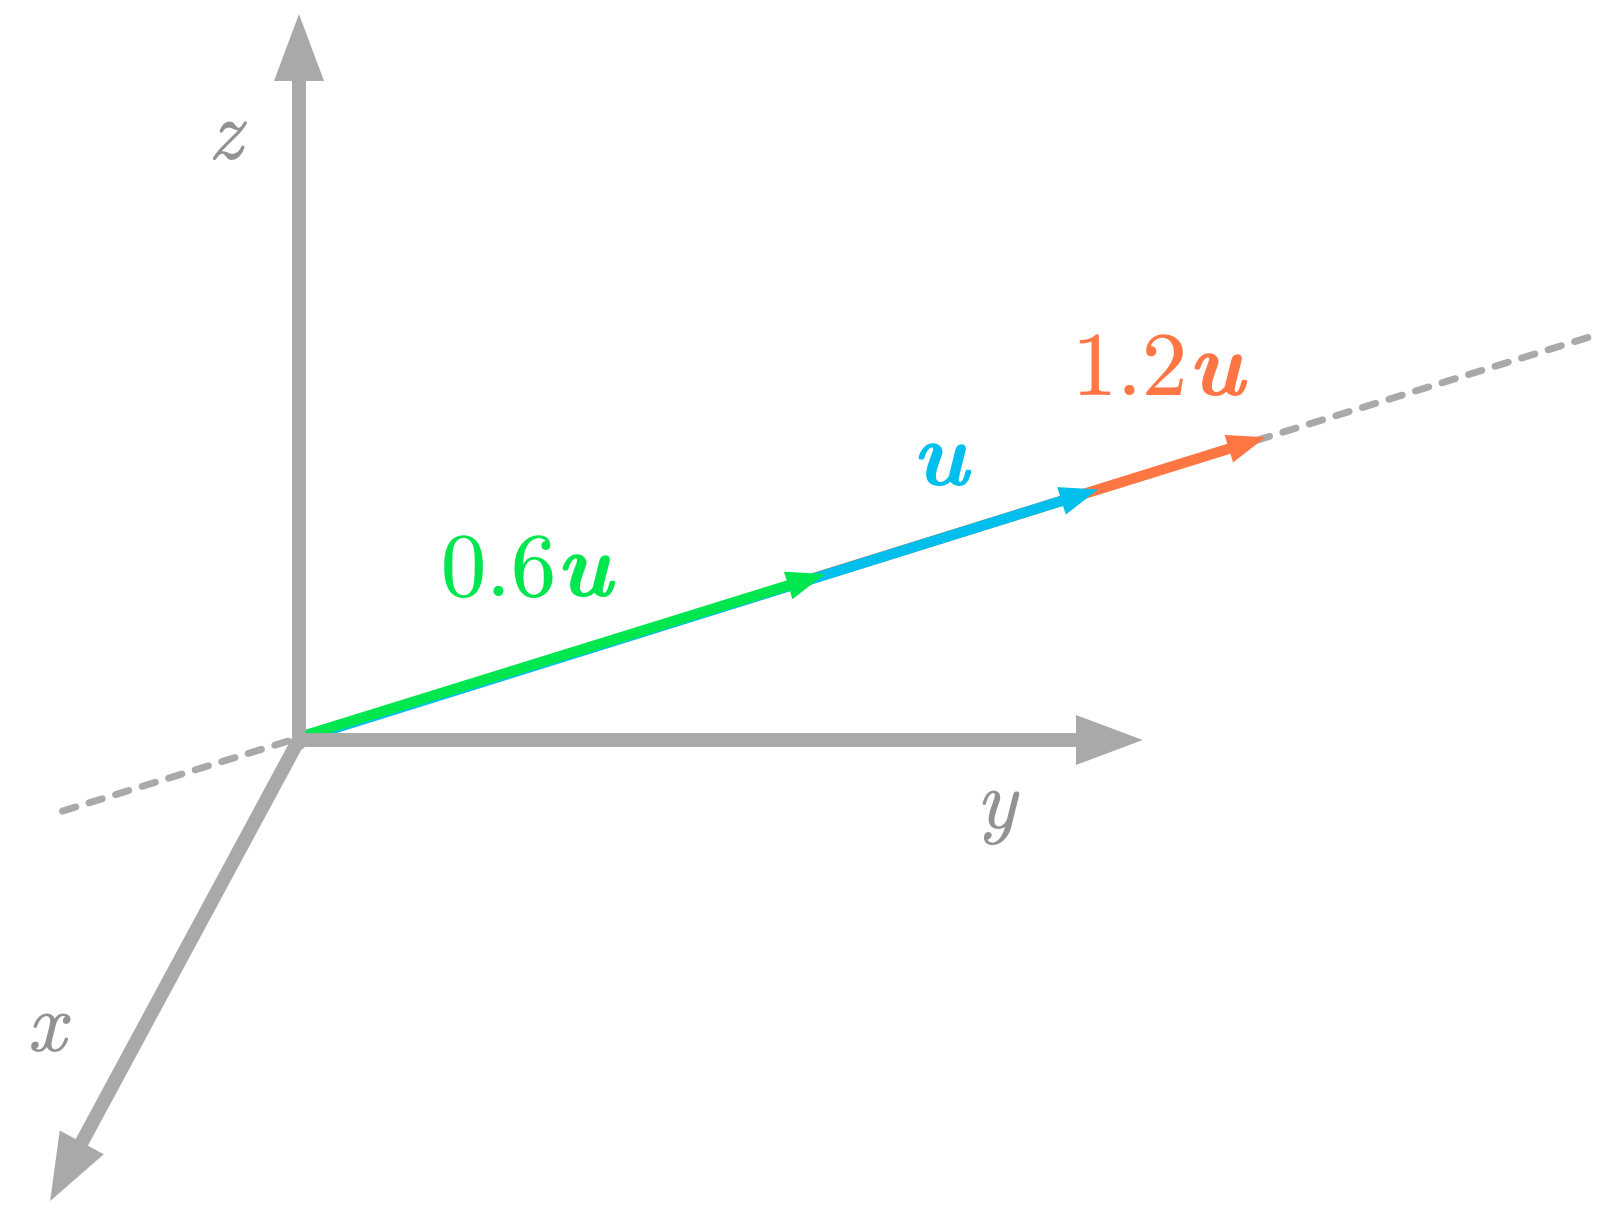<figcaption aria-hidden="true">Figure 118: Rescaling of the vector <span class="math inline">$\vu$</span> with various values of <span class="math inline"><em>a</em></span>.</figcaption>
</figure>

Figure [118](#fig:ch08_vector_rescaling) shows an example with a single
three-dimensional vector $\vu$. You can see that all combinations land
on the same line (represented as a dotted gray line).

#### Two Vectors

You saw earlier that the linear combination of two vectors is
algebraically defined by:

$$
a\vu + b\vv
$$

If $\vu$ and $\vv$ are on the same line, then all linear combinations
will stand on this same line, like in the case of a single vector. You
don’t gain information since the directions of both vectors are the same
(more details in Section 7.4).

However, if they are not on the same line, all combinations will draw a
plane.

<figure>
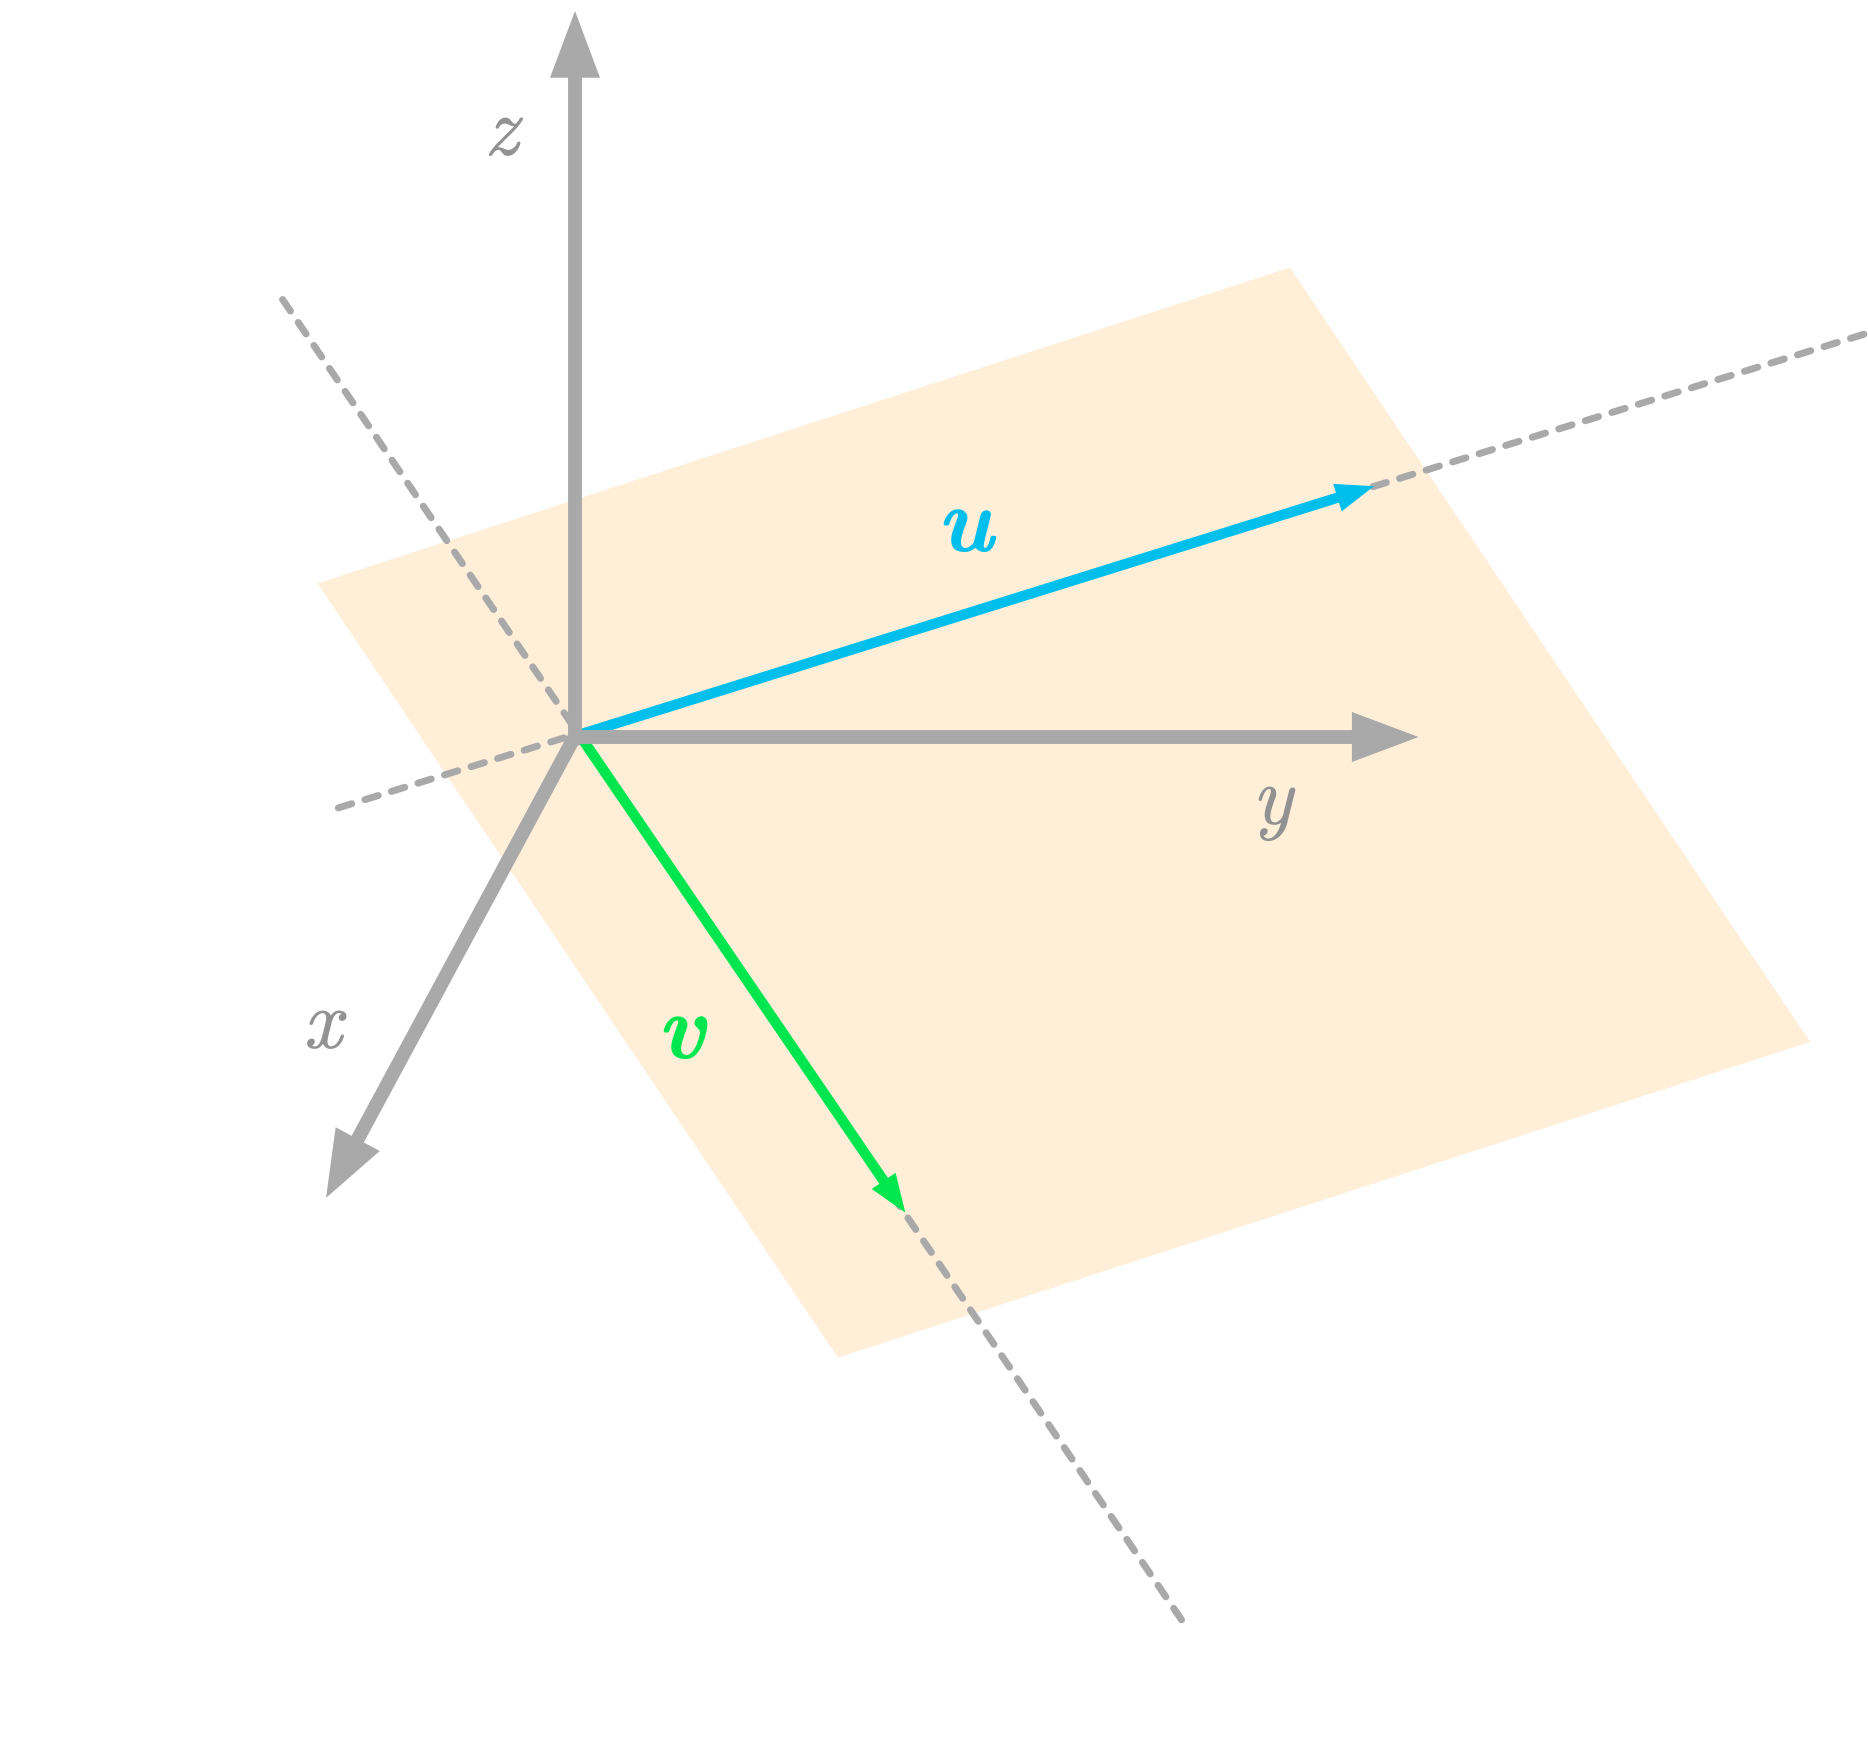<figcaption aria-hidden="true">Figure 119: All linear combinations of two vectors with different directions draw a plane.</figcaption>
</figure>

Figure [119](#fig:ch08_linear_combination_two_vectors) illustrates the
plane (in yellow) corresponding to all linear combinations of the two
vectors $\vu$ and $\vv$.

#### More Vectors

You can go further: what gives you all the linear combinations of three
vectors? If the three vectors have the same direction, the linear
combinations will still give you a line. If two of the three vectors
have the same direction and the third another direction, you’ll have a
situation similar to linear combinations of two vectors, and it will
draw a plane. Finally, if the three vectors have different directions,
all combinations will draw an hyperplane: that is, a plane with more
than two dimensions.

### 7.2.3 Span

You saw that you can consider all vectors that can be created by linear
combinations of two vectors: the resulting set of vectors is called the
*span* of these two vectors.

When linear combinations of a vectors fill the entire space, we say that
it spans the space.

The span of a set of vectors is the vector space of all vectors that can
be obtained from the linear combinations of these vectors.

You’ll see in Section 7.7
practical visualizations of the concept of span.

7.3 Subspaces
-------------

### 7.3.1 Definitions

A *subspace* is a subset of the initial space that is also a vector
space. For instance and as shown in Figure [120](#fig:ch08_subspace), if
you take a plane in $\setR^3$, this is a subspace of $\setR^3$ (with the
condition that it contains the origin, as you’ll see).

<figure>
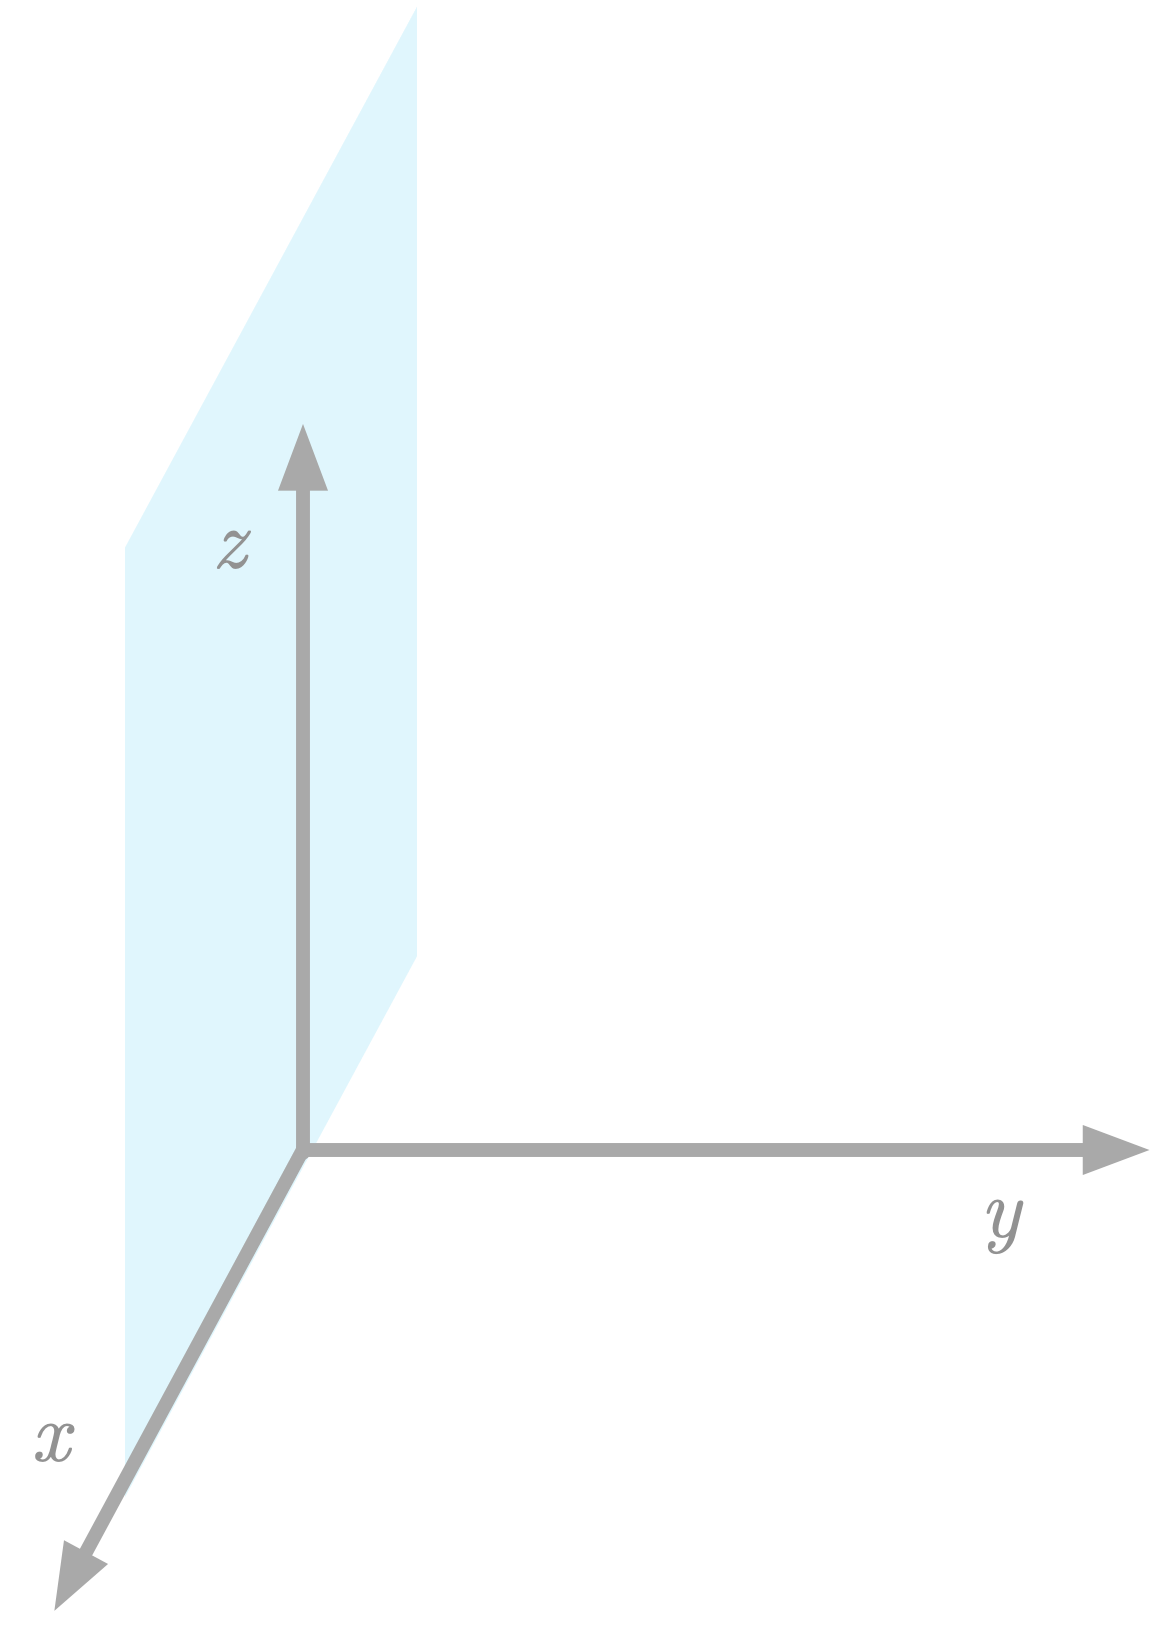<figcaption aria-hidden="true">Figure 120: Example of a subspace in <span class="math inline">$\setR^3$</span>.</figcaption>
</figure>

This doesn’t mean that the subspace is $\setR^2$ because vectors in this
subspace still have three components. This plane is a vector space
inside $\setR^3$.

More formally, two rules need to be fulfilled to characterize a set of
vectors as a subspace of a vector space:

1.  The addition of any two vectors in the subspace gives a vector in
    this same subspace.
2.  The multiplication of a vector in the subspace with any scalar gives
    a vector in the same subspace.

This means that for any vectors $\vv$ and $\vw$ in the subspace and any
scalar $a$, you should have $\vv + \vw$ and $a\vv$ in the subspace.

We say that this set of vectors is *closed* under addition and scalar
multiplication. This means that vectors resulting of linear combinations
of vectors in the subspace stay in the subspace.

In addition, the second rule implies that if a vector $\vv$ is in the
subspace, then $0 \cdot \vv$ has to be in the subspace as well. This
means that the zero vector (see
Section 5.1.3.3) has necessarily to be
in the subspace.

Another example of a subspace of $\setR^3$ is a line passing through the
origin (0, 0, 0). Or, the whole $\setR^3$ space, that is also considered
as a subspace of itself because the rules are fulfilled. Finally, the
zero vector itself is a subspace of $\setR^3$.

By definition, a subspace satisfies the rules introduced here, while a
subset of a space doesn’t have to.

### 7.3.2 Subspaces of a Matrix

#### Column Space

The *column space* of a matrix is the vector space corresponding to all
linear combinations of the column vectors of this matrix.

Let’s take the example of the following matrix:

$$
\mA = \begin{bmatrix}
    1 & 2 \\\\
    -1 & 0 \\\\
    3 & 2
\end{bmatrix}
$$

$\mA$ has the two column vectors
$\begin{bmatrix}  1 \\\\  -1 \\\\  3 \end{bmatrix}$ and
$\begin{bmatrix}  2 \\\\  0 \\\\  2 \end{bmatrix}$.

As you saw in Section 6.3.2,
if you multiply this matrix with a vector $\vx$, you have:

$$
\mA \vx = \begin{bmatrix}
    1 & 2 \\\\
    -1 & 0 \\\\
    3 & 2
\end{bmatrix}
\begin{bmatrix}
    \evx_1 \\\\
    \evx_2
\end{bmatrix}
= \evx_1\begin{bmatrix}
    1 \\\\
    -1 \\\\
    3
\end{bmatrix}
+ \evx_2\begin{bmatrix}
    2 \\\\
    0 \\\\
    2
\end{bmatrix}
$$

with $\evx_1$ and $\evx_2$ being scalars. The new vector $\mA \vx$ is a
linear combination of the two column vectors with the weights $\evx_1$
and $\evx_2$.

Now, consider all possible vectors $\vx$: it gives you possible linear
combinations of the columns of $\mA$. This set of vectors is the column
space of the matrix $\mA$.

Let’s visualize the column space of the matrix $\mA$:

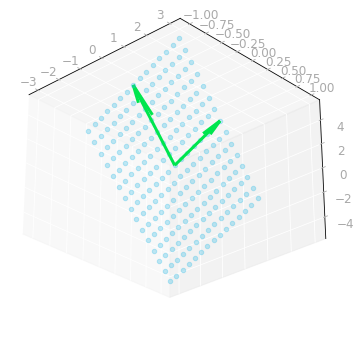

In [13]:

v1 = np.array([1, -1, 3])
v2 = np.array([2, 0, 2])

x = np.linspace(-1, 1, 15)
y = np.linspace(-1, 1, 15)

X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        z = x[i] * v1 + y[j] * v2
        ax.scatter(z[0], z[1], z[2], c='#2EBCE7', alpha=0.3)

ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color="#00E64E")
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color="#00E64E")

ax.view_init(elev=-28, azim=-47)


<figure>
<figcaption aria-hidden="true">Figure 121: The plane represented with the blue dots corresponds to linear combinations of the column vectors of <span class="math inline">$\mA$</span>. The column vectors are represented as green arrows.</figcaption>
</figure>

The plane represented in Figure [121](#fig:ch08_output_column_space)
corresponds to the points that you can reach using linear combinations
of the column vectors. This subspace is the column space of $\mA$.
You’ll see in Section 8.3 how the
column space of a matrix is useful to characterize systems of linear
equations.

#### Row Space

Similarly to the column space, the *row space* is the space
corresponding to every linear combinations of the matrix rows. You can
also consider the row space of $\mA$ as the column space of
$\mA^{\text{T}}$.

#### Transformations

You can also encounter the term *image* or *range* in the context of
transformations: the image or range of a transformation is the set of
all possible outputs produced by this transformation.

A linear transformation corresponding to a matrix $\mA$ is associated
with an *input space* and an *output space*. You’ll learn more about
that in Section 9 and
Section 10.

7.4 Linear dependency
---------------------

You have seen that the span of two vectors with the same direction is a
line: the information gathered by the vector $\vv$ and $\vw$ is not
different.

If both vectors have the same direction (they are on the same line), you
can’t access locations outside of this line with their linear
combination. There is a *linear dependency* between these two vectors.

Let’s consider a $m$ by $n$ matrix $\mA$: its columns are
$m$-dimensional vectors. If these column vectors are independent, the
matrix is invertible. If they are dependent, then the matrix is singular
(more details on invertible and singular matrices in
Section 6.4.4).

### 7.4.1 Geometric Interpretation

Let’s see the geometric interpretation of linear dependency between
vectors. Take the two vectors in a two-dimensional plane illustrated in
Figure [122](#fig:ch08_2d_independent_vectors).

<figure>
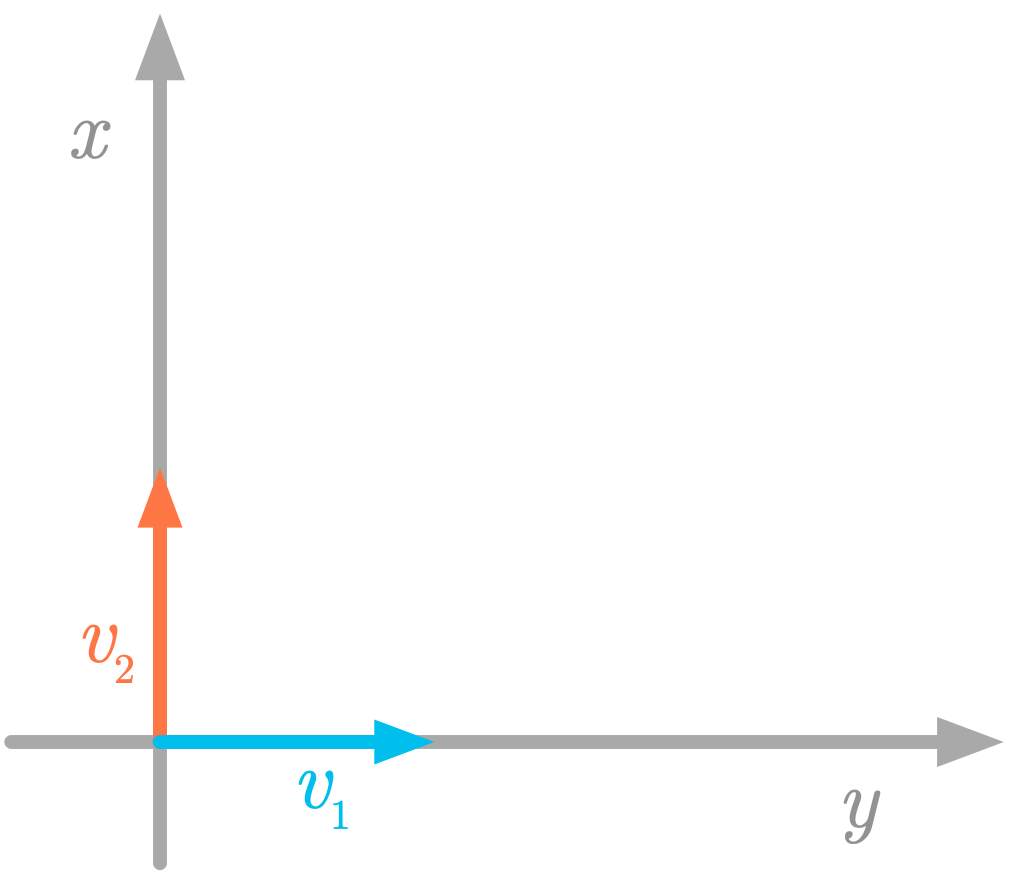<figcaption aria-hidden="true">Figure 122: Two independent vectors in a two-dimensional space: <span class="math inline"><em>v</em><sub>1</sub></span> and <span class="math inline"><em>v</em><sub>2</sub></span>.</figcaption>
</figure>

Can you find a linear combination of these two vectors that allows you
to start from the origin and come back to the origin (excluding the
multiplication of each vector by 0)? If yes, the vectors are dependent.
In our example, this is not possible because they are independent. The
reason is simply that if vectors are independent, you will go in two
different directions, so one of the vector cannot cancel the other.

However, if vector are dependent, for instance on the same line, you can
start from the origin and come back to the origin.

Another way to conceive independence between two vectors is to ask if
you can obtain one from the other.

### 7.4.2 Matrix View

Considering a matrix as the concatenation of multiple column vectors,
the number of rows $m$ corresponds to the dimensionality of each vector
and the number of column $n$ to the number of vectors.

Any set that contains more vectors than dimensions cannot be linearly
independent: a $m$ by $n$ matrix with $m < n$ (more columns than rows)
necessarily has dependent vectors. For instance, the maximum number of
independent vectors in $\setR^2$ is two: you can’t imagine a third
direction. Similarly, the maximum number of independent vectors in
$\setR^3$ is three, and so on.

Take for instance the following matrix $\mA$:

$$
\mA = \begin{bmatrix}
    2 & 7 & -3 \\\\
    9 & 1 & 6
\end{bmatrix}
$$

You can see it as three two-dimensional vectors, and these vectors
cannot be linearly independent.

Conversely, if $m > n$ (more rows than columns), the column vectors of
the matrix can’t span the space. For instance, two vectors can’t span
$\setR^3$, even if they are linearly independent: you will have only two
directions in a space where three directions are possible.

7.5 Basis
---------

### 7.5.1 Definitions

The *basis* is a coordinate system used to describe vector spaces (sets
of vectors). It is a reference that you use to associate numbers with
geometric vectors. You’ll for instance see in
Section 9.2 that the concept of
basis is important to understand eigendecomposition.

To be considered as a basis, a set of vectors must:

-   Be linearly independent.
-   Span the space.

Every vectors in the space is a unique combination of the basis vectors.
The dimension of a space is defined to be the size of a basis set. For
instance, there are two basis vectors in $\setR^2$ (corresponding to the
$x$ and $y$ axis in the Cartesian plane), or three in $\setR^3$.

As you saw in the last section, if the number of vectors in a set is
larger than the dimensions of the space, they can’t be linearly
independent. If a set contains fewer vectors than number of dimensions,
they can’t span the whole space.

As you saw, vectors can be represented as arrows going from the origin
to a point in space. The coordinates of this point can be stored in a
list. The geometric representation of a vector in the Cartesian plane
implies that we take a reference: the directions given by the two axes
$x$ and $y$.

*Basis vectors* are the vectors corresponding to this reference. In the
Cartesian plane, the basis vectors are orthogonal unit vectors (length
of one), generally denoted as $\vi$ and $\vj$.

<figure>
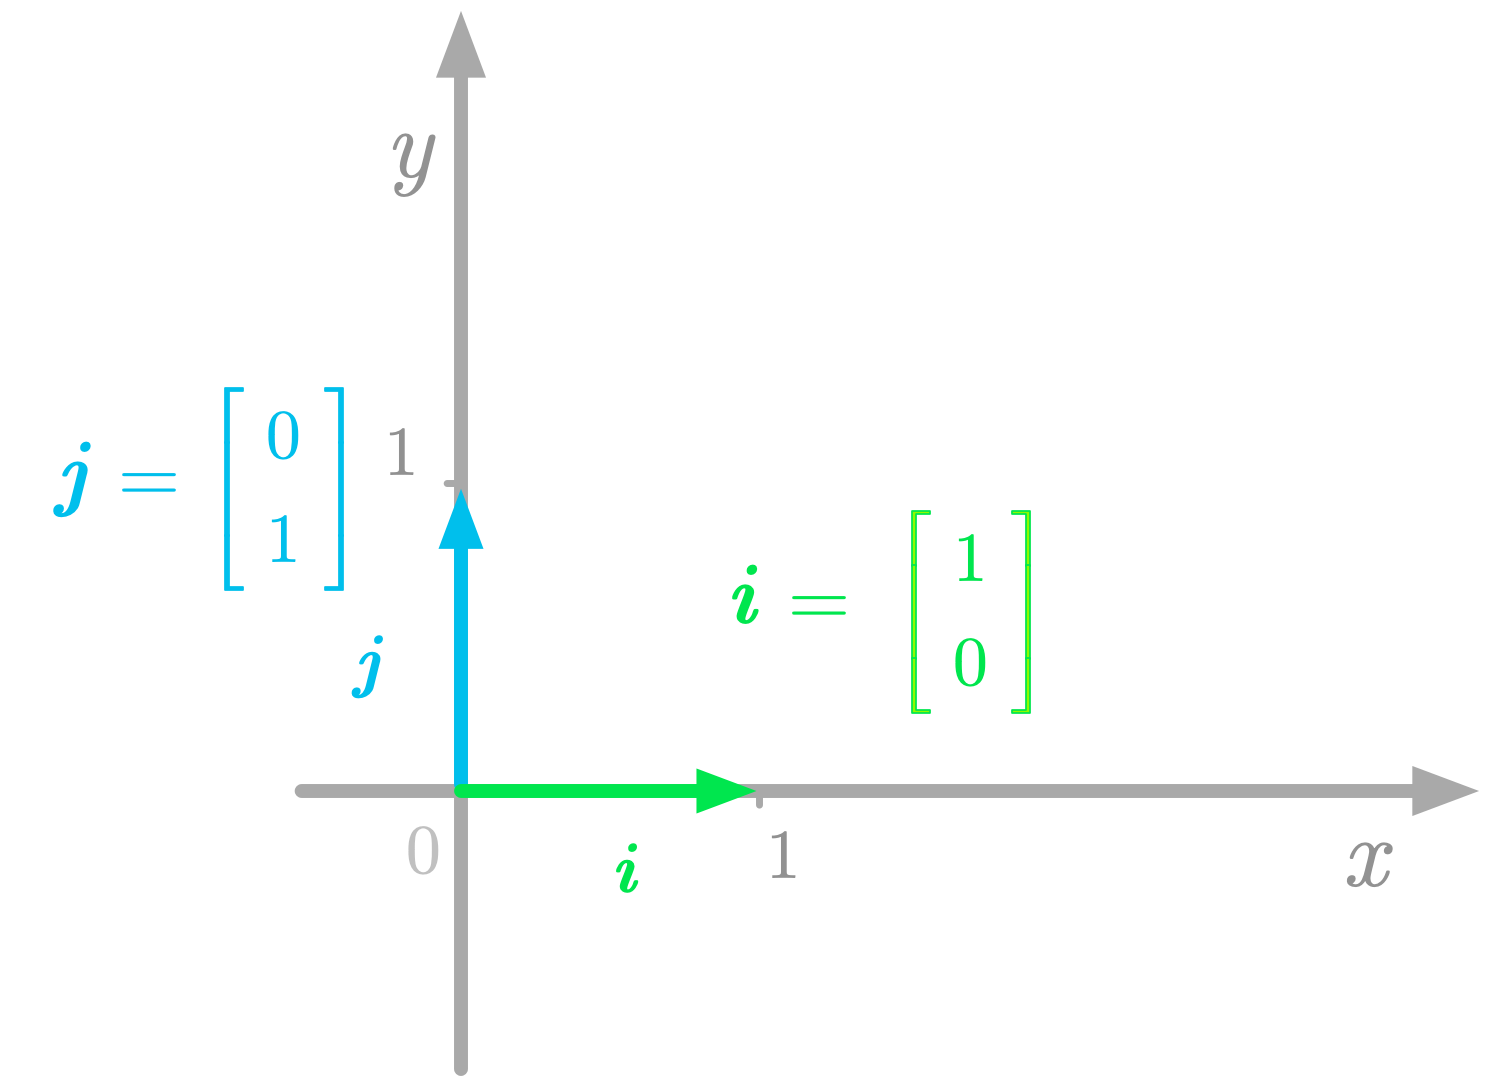<figcaption aria-hidden="true">Figure 123: The basis vectors in the Cartesian plane.</figcaption>
</figure>

For instance, in Figure [123](#fig:ch08_basis_vectors), the basis
vectors $\vi$ and $\vj$ point in the direction of the axis $x$ and $y$
respectively. These vectors give the standard basis. If you put these
basis vectors into a matrix, you have the following identity matrix (see
Section 6.4.3):

$$
\mI_2 = \begin{bmatrix}
    1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

Thus, the columns of $\mI_2$ span $\setR^2$. In the same way, the
columns of $\mI_3$ span $\setR^3$ and so on.

Basis vectors can be orthogonal because orthogonal vectors are
independent. However, the converse is not necessarily true: non
orthogonal vectors can be linearly independent and thus form a basis
(but not a standard basis).

The basis of your vector space is very important because the values of
the coordinates corresponding to the vectors depends on this basis. By
the way, you can choose different basis vectors, like in the ones in
Figure [124](#fig:ch08_new_basis) for instance.

<figure>
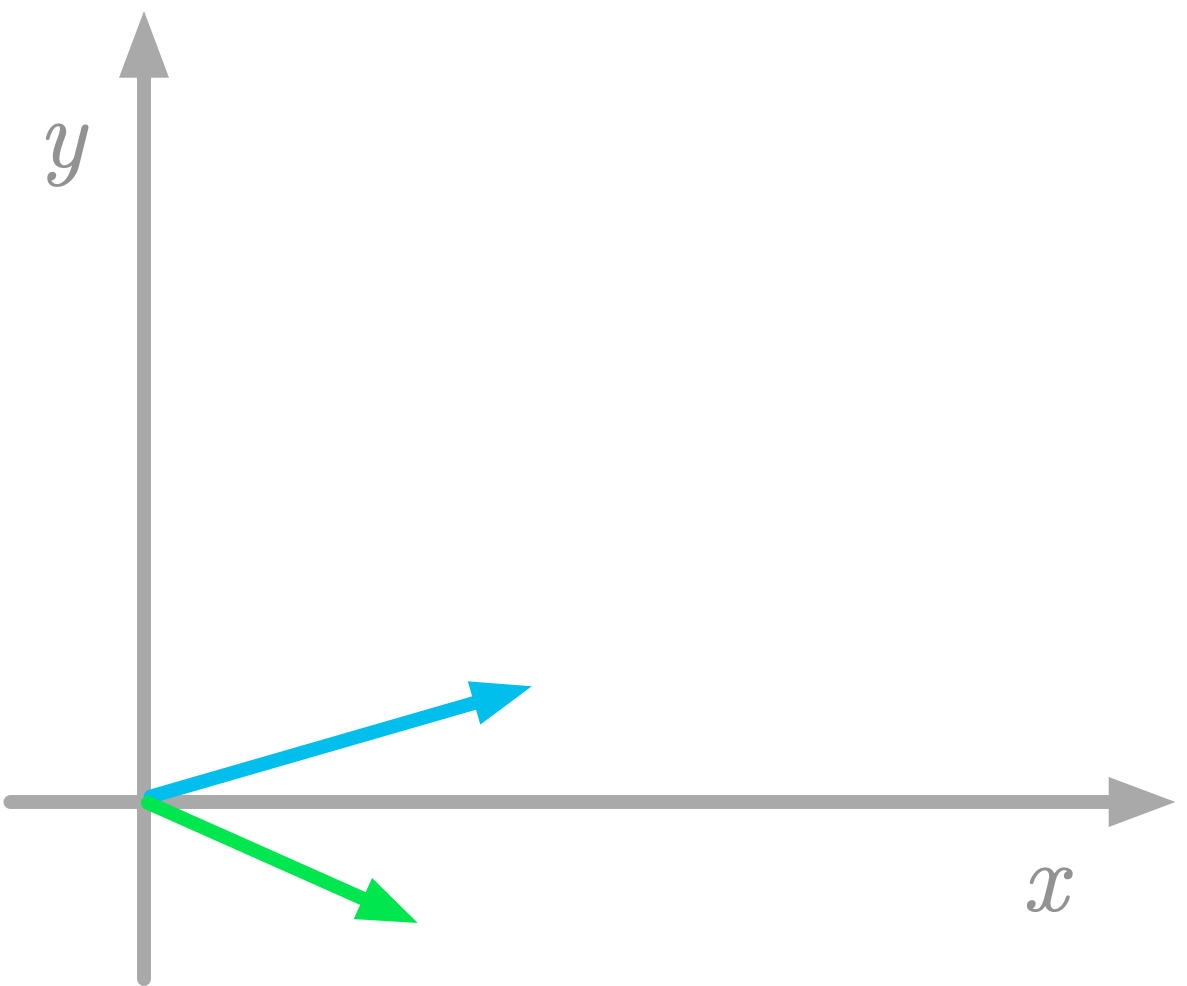<figcaption aria-hidden="true">Figure 124: Another set of basis vectors.</figcaption>
</figure>

Keep in mind that vector coordinates depend on an implicit choice of
basis vectors.

### 7.5.2 Linear Combination of Basis Vectors

You can consider any vector in a vector space as a linear combination of
the basis vectors.

For instance, take the following two-dimensional vector $\vv$:

$$
\vv = \begin{bmatrix}
    2 \\\\
    -0.5
\end{bmatrix}
$$

<figure>
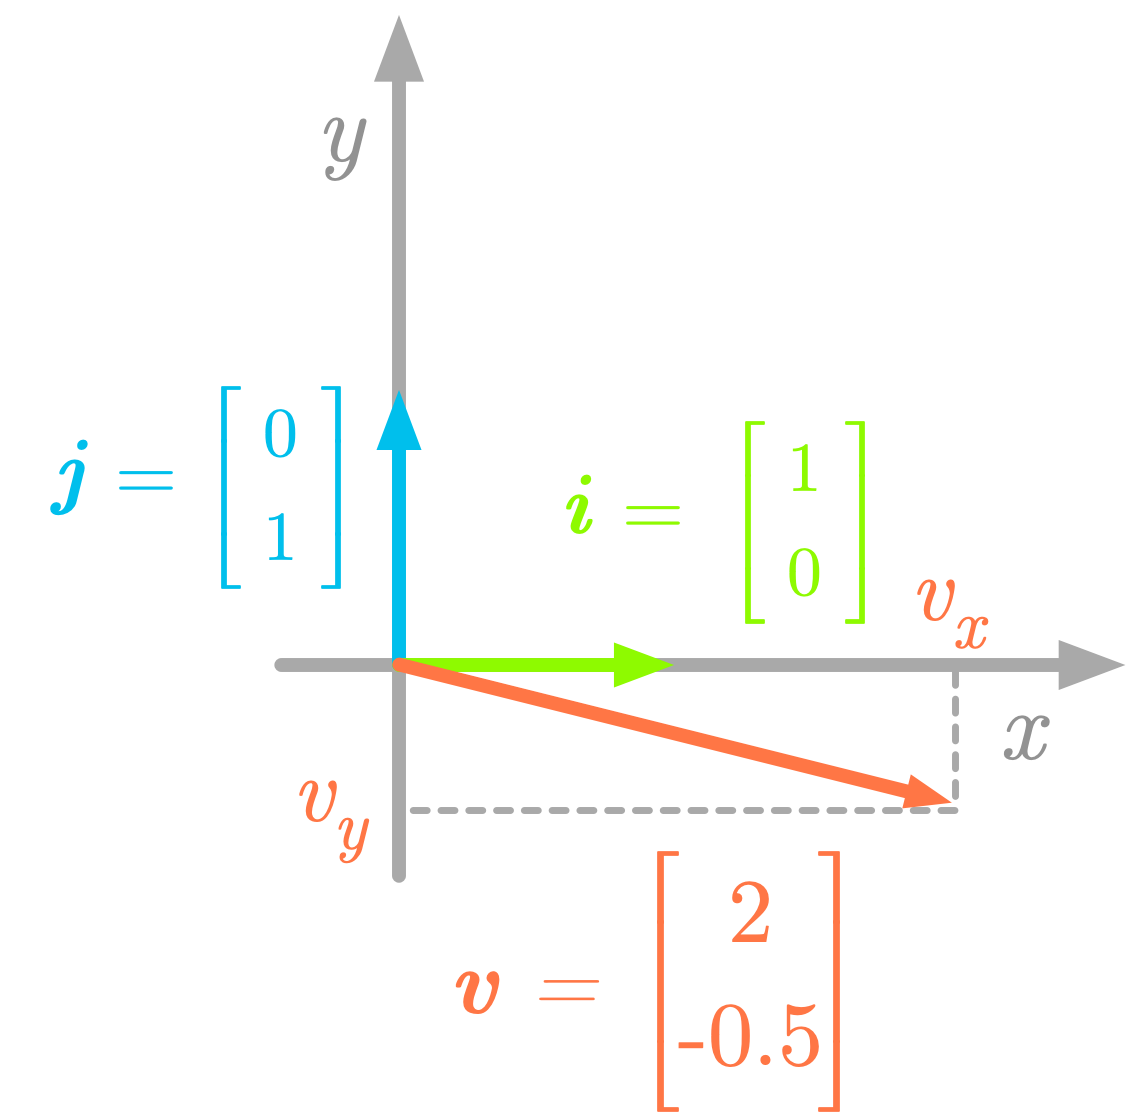<figcaption aria-hidden="true">Figure 125: Components of the vector <span class="math inline">$\vv$</span>.</figcaption>
</figure>

The components of the vector $\vv$ are the projections on the $x$-axis
and on the $y$-axis ($\evv_x$ and $\evv_y$, as illustrated in Figure
[125](#fig:ch08_linear_combination_projection)). The vector $\vv$
corresponds to the sum of its components: $\vv = \evv_x + \evv_y$, and
you can obtain these components by scaling the basis vectors:
$\evv_x = 2 \vi$ and $\evv_y = -0.5 \vj$. Thus, the vector $\vv$ shown
in Figure [125](#fig:ch08_linear_combination_projection) can be
considered as a linear combination of the two basis vectors $\vi$ and
$\vj$:

$$
\begin{aligned}
\vv &= 2\vi - 0.5\vj \\\\
&= 2\begin{bmatrix}
    1 \\\\
    0
\end{bmatrix}
- 0.5\begin{bmatrix}
    0 \\\\
    1
\end{bmatrix} \\\\
&= \begin{bmatrix}
    2 \cdot 1 \\\\
    2 \cdot 0
\end{bmatrix}
- \begin{bmatrix}
    0.5 \cdot 0 \\\\
    0.5 \cdot 1
\end{bmatrix} \\\\
&= \begin{bmatrix}
    2 \\\\
    -0.5
\end{bmatrix}
\end{aligned}
$$

### 7.5.3 Other Bases

The columns of identity matrices are not the only case of linearly
independent columns vectors. It is possible to find other sets of $n$
vectors linearly independent in $\setR^n$.

For instance, let’s consider the following vectors in $\setR^2$:

$$
\vv = \begin{bmatrix}
    2 \\\\
    -0.5
\end{bmatrix}
$$

and

$$
\vw = \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$

The vectors $\vv$ and $\vw$ are represented in Figure
[126](#fig:ch08_another_basis).

<figure>
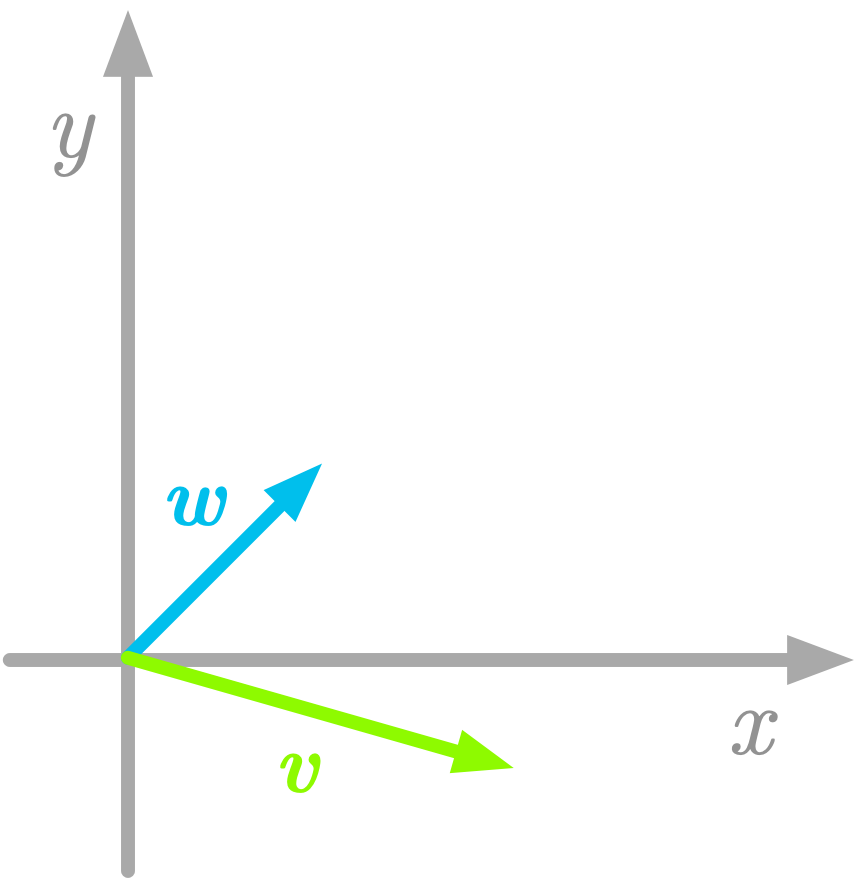<figcaption aria-hidden="true">Figure 126: Another basis in a two-dimensional space.</figcaption>
</figure>

From the definition above, the vectors $\vv$ and $\vw$ are a basis
because they are linearly independent (you can’t obtain one of them from
combinations of the other) and they span the space (all the space can be
reached from the linear combinations of these vectors).

It is critical to keep in mind that, when you use the components of
vectors (for instance $\evv_x$ and $\evv_y$, the $x$ and $y$ components
of the vector $\vv$), the values are relative to the basis you chose. If
you use another basis, these values will be different.

You’ll see later that the ability to change the bases is fundamental in
linear algebra and is key to understand eigendecomposition
(Section 9) or
Singular Value Decomposition
(Section 10).

### 7.5.4 Vectors Are Defined With Respect to a Basis

You saw that, to associate geometric vectors (arrows in the space) with
coordinate vectors (arrays of numbers), you need a reference. This
reference is the basis of your vector space. For this reason, a vector
should always be defined with respect to a basis.

Let’s take the following vector:

$$
\vv = \begin{bmatrix}
    2 \\\\
    -0.5
\end{bmatrix}
$$

The values of the $x$ and $y$ components are respectively $2$ and
$-0.5$. The standard basis is used when not specified.

You could write $\mI \vv$ to specify that these numbers correspond to
coordinates with respect to the standard basis. In this case $\mI$ is
called the *change of basis matrix*.

$$
\vv = \mI\vv = \begin{bmatrix}
    2 \\\\
    -0.5
\end{bmatrix}
$$

You can define vectors with respect to another basis by using another
matrix than $\mI$. You’ll see more about change of basis in
Section 9.2.

7.6 Special Characteristics
---------------------------

In this last section, you’ll see special matrix characteristics needed
for more advanced linear algebra: the rank, the trace and the
determinant of a matrix.

### 7.6.1 Rank

The *rank* of a matrix $\mA$ (denoted as $\text{rank}(\mA)$) is the
number of linearly independent columns or linearly independent rows.
Matrices have always the same number of independent columns and
independent rows. This implies that the rank of a matrix $\mA$ is equal
to the rank of its transpose $\mA^{\text{T}}$.

It is possible to use `np.linalg.matrix_rank()` to calculate the rank of
a matrix with Numpy.

In [14]:
A = np.array([
    [0.4, -2.3, 7.5],
    [-2.3, 1.9, 4.3],
    [7.5, 4.3, 1.0],
])

In [15]:
np.linalg.matrix_rank(A)

3

In [16]:
np.linalg.matrix_rank(A.T)

3

The matrix $\mA$ has rank 3, meaning that it has three linearly
independent columns and three independent rows.

Let’s take another example:

In [17]:
A = np.array([
    [1, 2, 5],
    [2, 4, 8],
    [3, 6, 2],
])

In [18]:
np.linalg.matrix_rank(A)

2

In [19]:
np.linalg.matrix_rank(A.T)

2

You can see that the first two columns of $\mA$ are dependent (the
second column corresponds to the first multiplied by two). This means
that there are only two independent columns and thus the rank of the
matrix is two.

A matrix with the highest possible rank (all columns are independent) is
said to have a *full rank*. If the rank is lower, it is said to be *rank
deficient*. A rank deficient square matrix is singular, meaning that it
has no inverse (see
Section 6.4.4).

### 7.6.2 Trace

The *trace* is the sum of the main diagonal values of a square matrix.
For instance, take the following matrix $\mA$:

$$
\mA=
\begin{bmatrix}
    5 & 4 & -9 \\\\
    -2 & 3 & 3 \\\\
    0 & -1 & 7
\end{bmatrix}
$$

The trace of the matrix $\mA$ is:

$$
\text{Tr}(\mA) = 5 + 3 + 7 = 15
$$

More formally, for a square matrix $\mA$ of shape $n \times n$, you can
write:

$$
\text{Tr}(\mA) = \sum_{i=1}^n \mA_{i, i} = \mA_{1, 1}, \mA_{2, 2}, \cdots, \mA_{n, n}
$$

The same index for rows and columns ($i$) means that you sum all values
from the main diagonal.

#### Expression of the Frobenius Norm

A nice property of the trace operator is that you can use it to express
the Frobenius norm of a matrix, as following:

$$
\norm{\mA}_{F} = \sqrt{\text{Tr}(\mA \mA^{\text{T}})}
$$

Let’s take an example with the previous matrix $\mA$ and let’s start by
calculating $\mA\mA^{\text{T}}$:

In [20]:
A = np.array([
    [5, 4, -9],
    [-2, 3, 3],
    [0, -1, 7],
])


In [21]:
A @ A.T

array([[122, -25, -67],
       [-25,  22,  18],
       [-67,  18,  50]])

Let’s now calculate $\sqrt{\text{Tr}(\mA \mA^{\text{T}})}$:

In [22]:
np.sqrt(np.trace(A @ A.T))

13.92838827718412

Now let’s calculate the Frobenius norm from the formula:

$$
\norm{\mA}_{F} = \sqrt{\sum_{i,j}\mA^{2}_{i,j}}
$$

You have:

In [23]:
np.sqrt(np.sum(A.flatten() ** 2))

13.92838827718412

If you look back at the calculation of $\mA\mA^{\text{T}}$, you can see
in Figure [127](#fig:ch08_trace_frobenius) that each value of the
diagonal is the sum of the squared values of the corresponding line. The
trace is thus the total sum of the squared values.

<figure>
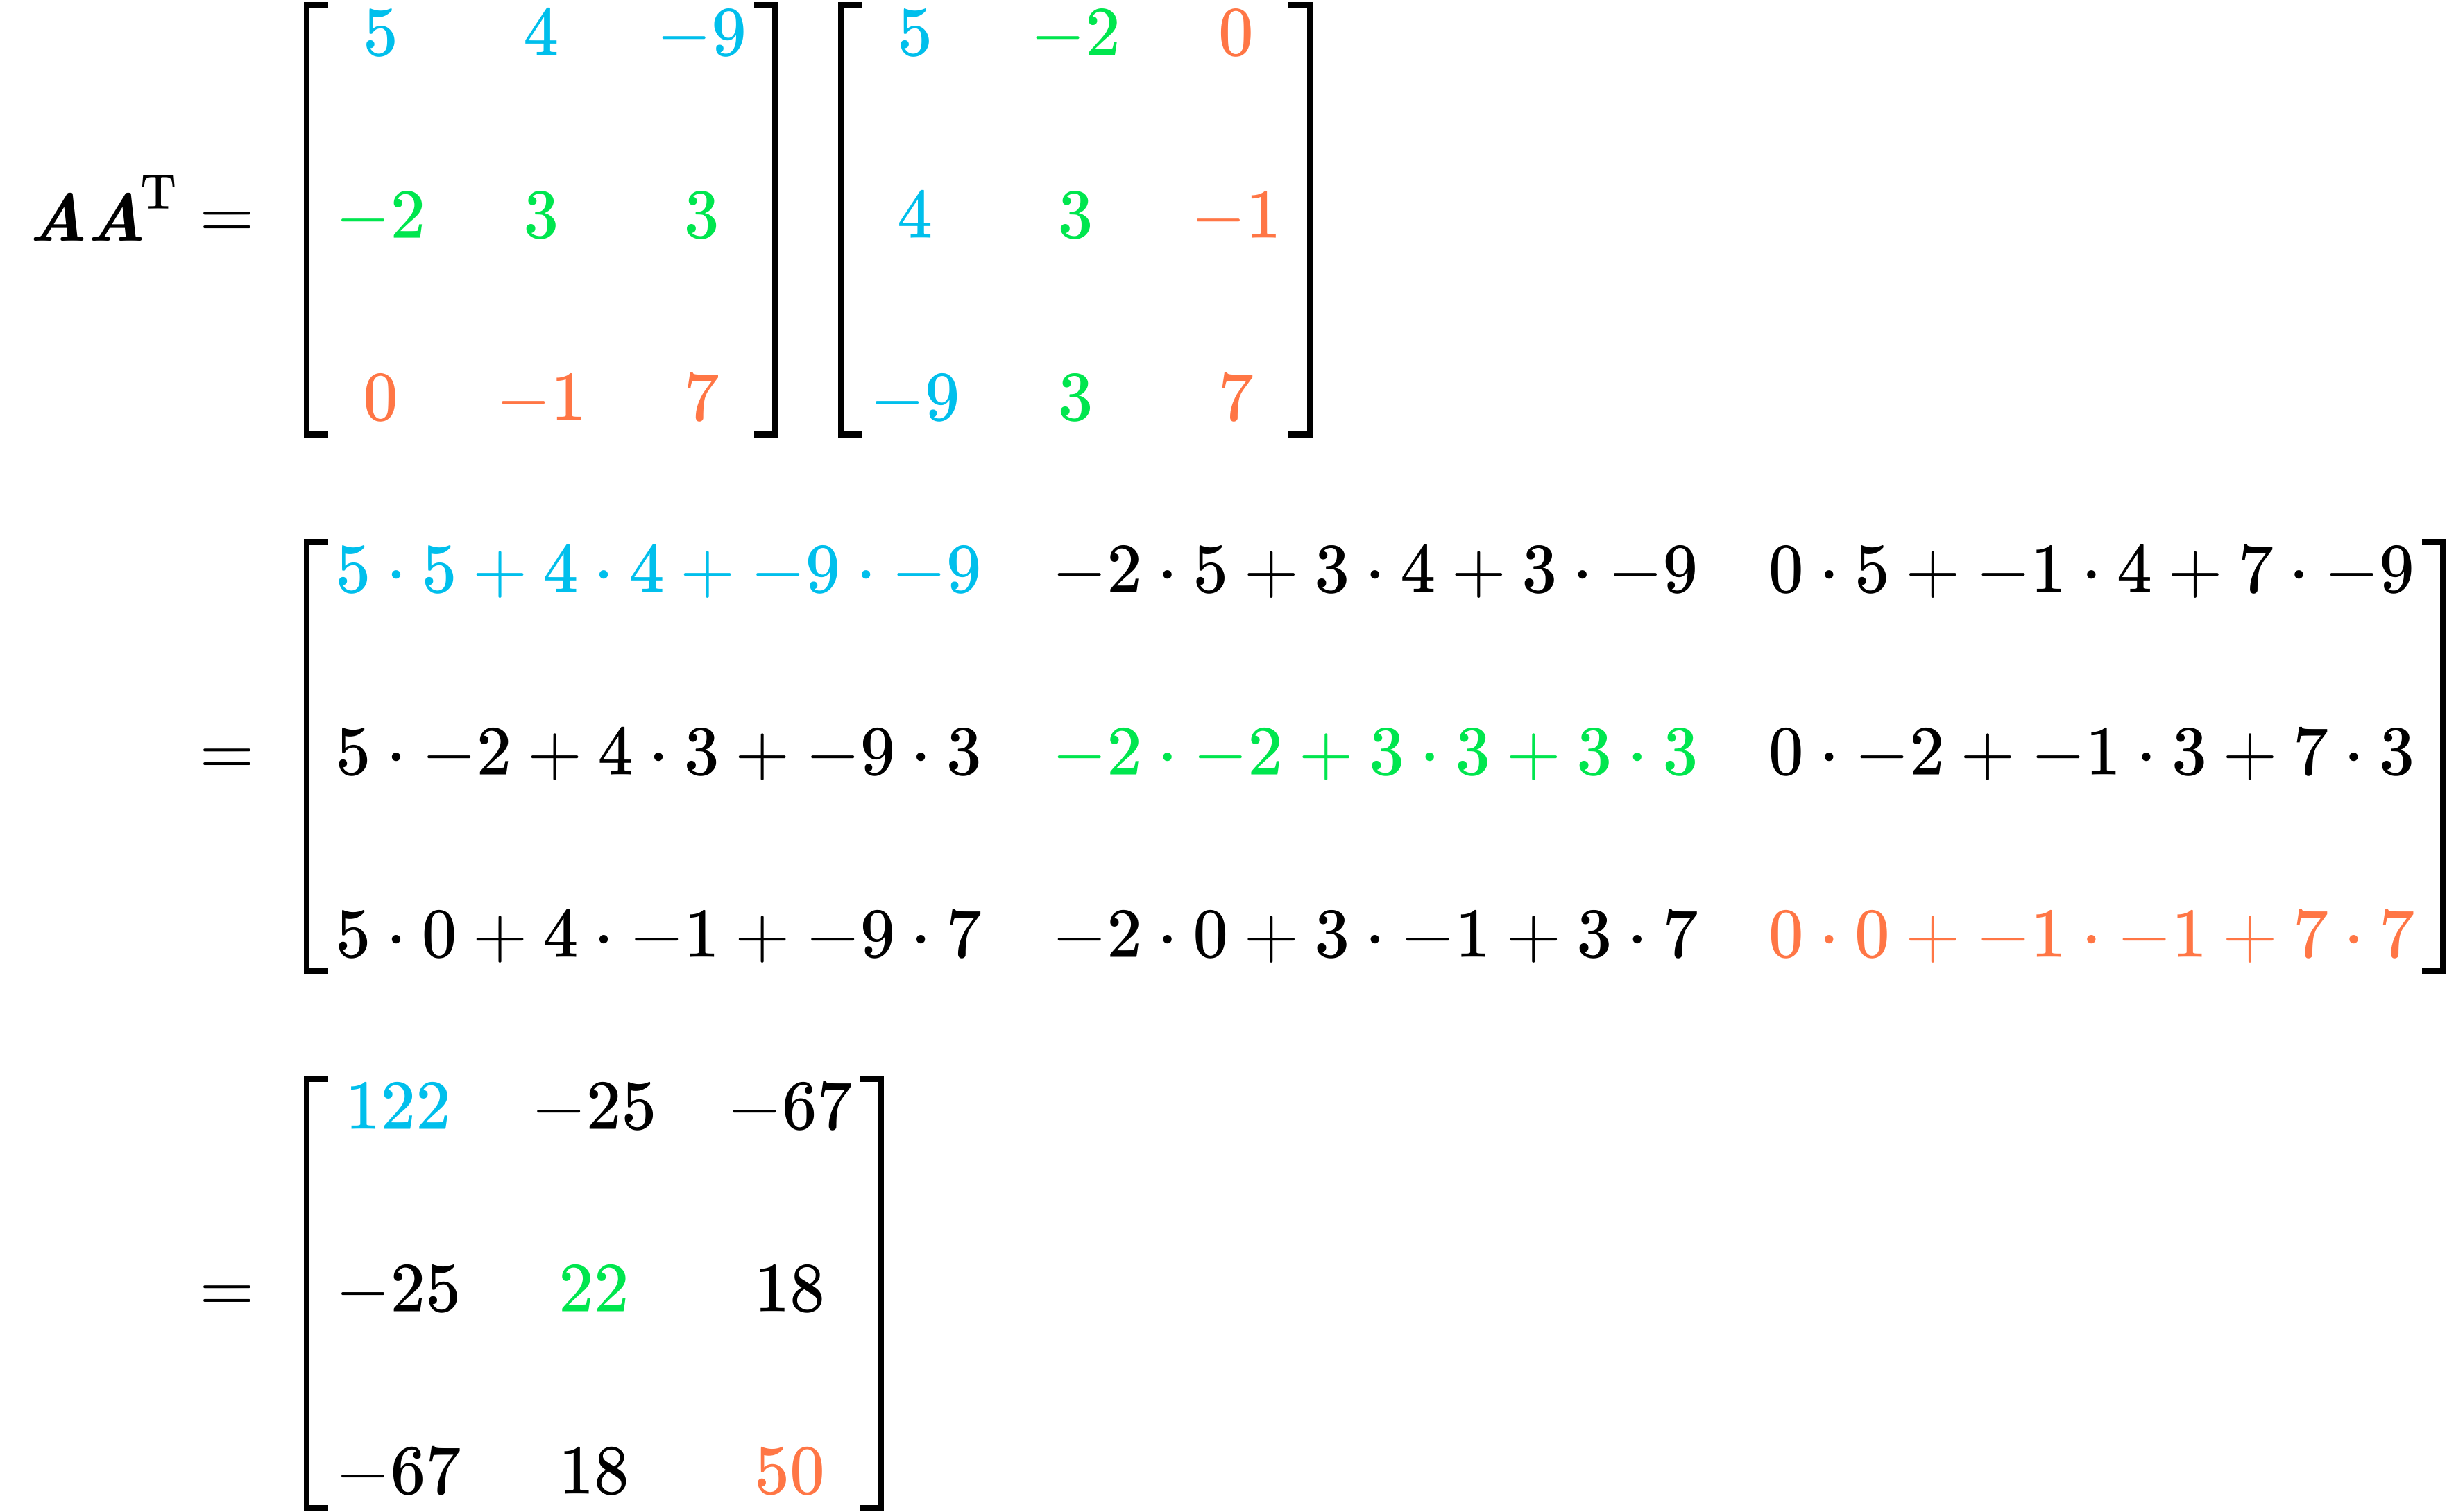<figcaption aria-hidden="true">Figure 127: Using <span class="math inline">$\mA \mA^{\text{T}}$</span> to calculate the Frobenius norm of <span class="math inline">$\mA$</span>.</figcaption>
</figure>

Since the trace uses only the main diagonal of the matrix, you have:

$$
\text{Tr}(\mA) = \text{Tr}(\mA^{\text{T}})
$$

#### Properties

The trace operator has a *cyclic* property: this means that the trace of
the product of multiple matrices is equal to the trace of the matrices
in another order (a cyclic order). Mathematically written:

$$
\text{Tr}(\mA\mB) = \text{Tr}(\mB\mA)
$$

When there are more than two square matrices multiplied, you have:

$$
\text{Tr}(\mA\mB\mC) = \text{Tr}(\mC\mA\mB) = \text{Tr}(\mB\mC\mA)
$$

In addition, the trace operator has the following properties:

$$
\text{Tr}(\mA + \mB) = \text{Tr}(\mA) + \text{Tr}(\mB)
$$

and

$$
\text{Tr}(c\mA) = c\text{Tr}(\mA)
$$

with $c$ being a scalar.

### 7.6.3 Determinant

The *determinant* is a function that associates a number to any square
matrix. This number tells you information about the matrix. For
instance, a matrix with a determinant equals to zero is singular (not
invertible).

The determinant of the matrix $\mA$ is denoted as $\text{det}(\mA)$ or
$|\mA|$, like the absolute value symbol.

For a two by two matrix, the determinant is calculated by subtracting
the product of the diagonals. Given the following matrix $\mA$:

$$
\mA=
\begin{bmatrix}
    a & b \\\\
    c & d
\end{bmatrix}
$$

The determinant of $\mA$ is $ad - bc$. For instance, the determinant of
the following singular matrix:

$$
\mA=
\begin{bmatrix}
    2 & 4 \\\\
    -1 & -2
\end{bmatrix}
$$

is $(2 \cdot -2) - (4 \cdot -1) = 0$

#### Geometric Point of View

You saw that you can consider matrices as linear transformations. The
determinant of a matrix tells you something about this transformation:
it tells you how the area of a shape (or a volume in $\setR^3$, or a
hyper-volume in higher dimensions) changes when the matrix is applied.

Let’s take an example with the two-dimensional unit vectors $\vi$ and
$\vj$: they form a one by one square, so the area of this *unit square*
is one.

Now, take the following matrix:

$$
\mT=
\begin{bmatrix}
    2 & 0 \\\\
    0 & 2
\end{bmatrix}
$$

Let’s visualize the effect of the matrix $\mA$ on the unit square:

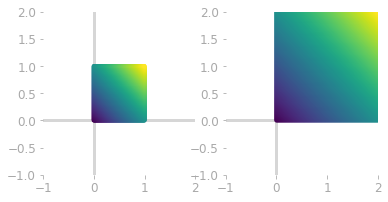

In [24]:


x = np.arange(0, 1.01, 0.01)
y = np.arange(0, 1.01, 0.01)

xx, yy = np.meshgrid(x, y)

xy =  np.vstack([xx.flatten(), yy.flatten()])
xy.shape


T = np.array([
    [2, 0],
    [0, 2]
])
trans = T @ xy

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[1].scatter(trans[0].reshape(xx.shape), trans[1].reshape(yy.shape), s=10, c=xx+yy)
# [...] Add axis, x and y witht the same scale

# draw axes
axes[0].axhline(0, c='#d6d6d6', zorder=0)
axes[0].axvline(0, c='#d6d6d6', zorder=0)
axes[1].axhline(0, c='#d6d6d6', zorder=0)
axes[1].axvline(0, c='#d6d6d6', zorder=0)

axes[0].set_xlim(-1, 2)
axes[0].set_ylim(-1, 2)

axes[1].set_xlim(-1, 2)
axes[1].set_ylim(-1, 2)
plt.show()



<figure>
<figcaption aria-hidden="true">Figure 128: Visualization of the unit square (left panel) and the unit square after applying the matrix <span class="math inline">$\mT$</span>.</figcaption>
</figure>

You can see in Figure
[128](#fig:ch08_output_applying_matrix_unit_square) that the area of the
transformed unit square is $2 \times 2 = 4$. Let’s calculate the
determinant of the matrix $\mT$:

$$
\text{det}(\mT) = (2 \cdot 2) - (0 \cdot 0) = 4
$$

The determinant of the matrix corresponds to the area of the transformed
unit square. This means that the area of any shape is multiplied by 4
when the matrix $\mT$ is applied.

#### Positive vs Negative Determinant

A positive determinant corresponds to rotations and scalings while a
negative determinant corresponds to a change in orientation (like mirror
transformations).

#### Determinant Greater or Lower than 1

A determinant between 0 and 1 corresponds to a decrease of the area and
a determinant greater than 1 to an increase of the area.

The determinant of orthogonal matrices is either -1 or 1.

The determinant of diagonal matrices is the product of the diagonal
values.

7.7 Hands-On Project: Span
--------------------------

Let’s visualize the span of two vectors. You will calculate linear
combinations of these two vectors and look at the result. Let’s start
with the basis vectors $\vi$ and $\vj$ in a two-dimensional space:

$$
\vi = \begin{bmatrix}
    1 \\\\
    0
\end{bmatrix}
$$

and

$$
\vj = \begin{bmatrix}
    0 \\\\
    1
\end{bmatrix}
$$

Let’s create the basis vectors:

In [25]:
i = np.array([0, 1])
j = np.array([1, 0])

Now, let’s calculate linear combinations of the basis vectors:

In [26]:
x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

span_x = np.zeros(x.shape[0] * y.shape[0])
span_y = np.zeros(x.shape[0] * y.shape[0])

counter = 0
for ii in x:
    for jj in y:
        res = ii * i + jj * j
        span_x[counter] = res[0]
        span_y[counter] = res[1]
        
        counter += 1


Now, let’s draw the results of these linear combinations.

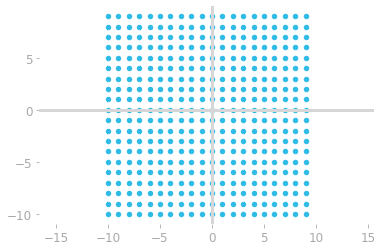

In [27]:
plt.scatter(span_x, span_y, s=20)
# [...] Add axes and styles

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#d6d6d6')
plt.axvline(0, c='#d6d6d6')

# assure x and y axis have the same scale
plt.axis('equal')
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 129: The span is represented as a grid of points resulting from linear combinations of the basis vectors.</figcaption>
</figure>

It is like in
Section 7.1.3 but without
using `meshgrid()` to emphasize how to calculate linear combinations of
vectors.

Figure [129](#fig:ch08_output_span_vectors) shows that you can reach
every points in the two-dimensional space with the combinations of the
basis vectors. Note that the points only stop because of the finite
number of values used in the calculations.

Let’s try with another set of vectors (Figure
[130](#fig:ch08_span_other_vectors)):

$$
\vv = \begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$

and

$$
\vw = \begin{bmatrix}
    1 \\\\
    0
\end{bmatrix}
$$

<figure>
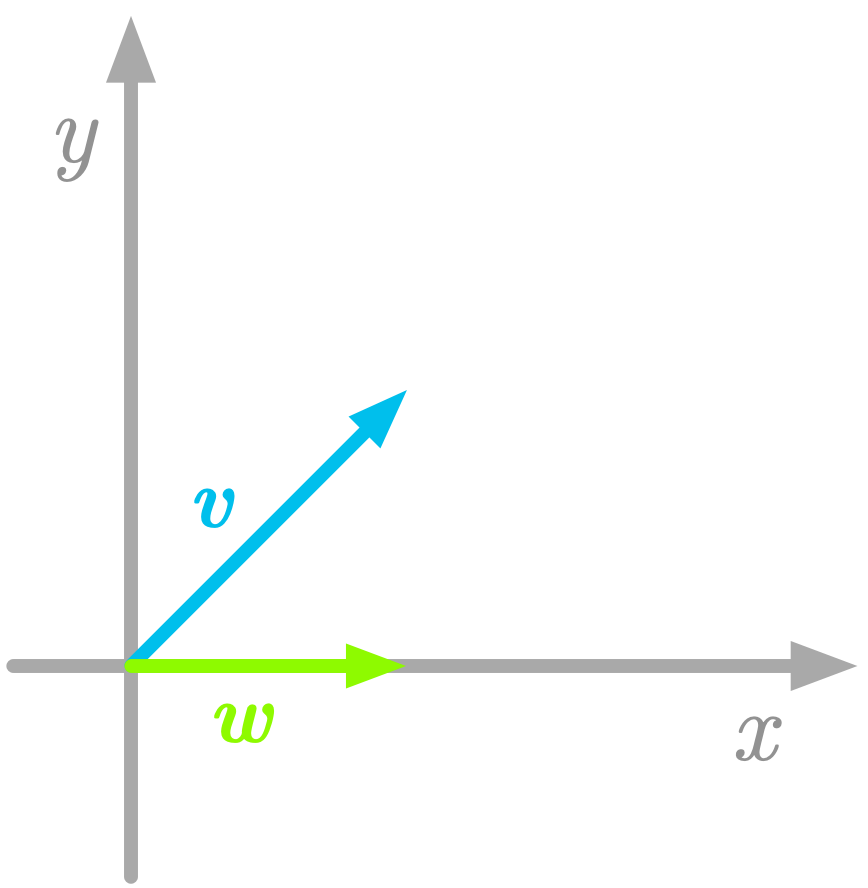<figcaption aria-hidden="true">Figure 130: The two vectors <span class="math inline">$\vv$</span> and <span class="math inline">$\vw$</span>.</figcaption>
</figure>

Similarly, let’s calculate the span of $\vv$ and $\vw$.

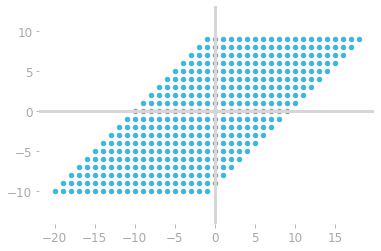

In [28]:

v = np.array([1, 1])
w = np.array([1, 0])

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

span_x = np.zeros(x.shape[0] * y.shape[0])
span_y = np.zeros(x.shape[0] * y.shape[0])

counter = 0
for vv in x:
    for ww in y:
        res = vv * v + ww * w
        span_x[counter] = res[0]
        span_y[counter] = res[1]
        
        counter += 1
        
        
# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# draw axes
plt.axhline(0, c='#d6d6d6')
plt.axvline(0, c='#d6d6d6')

# assure x and y axis have the same scale
plt.axis('equal')


plt.scatter(span_x, span_y, s=20)
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 131: The span of the vectors <span class="math inline">$\vv$</span> and <span class="math inline">$\vw$</span>.</figcaption>
</figure>

You can see in Figure [131](#fig:ch08_output_span_vectors_1) that the
span of these non-orthogonal vectors also cover the entire
two-dimensional plane.

Finally, you can try with the following vectors that have the same
direction:

$$
\vv = \begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$

and

$$
\vw = \begin{bmatrix}
    2 \\\\
    4
\end{bmatrix}
$$

<figure>
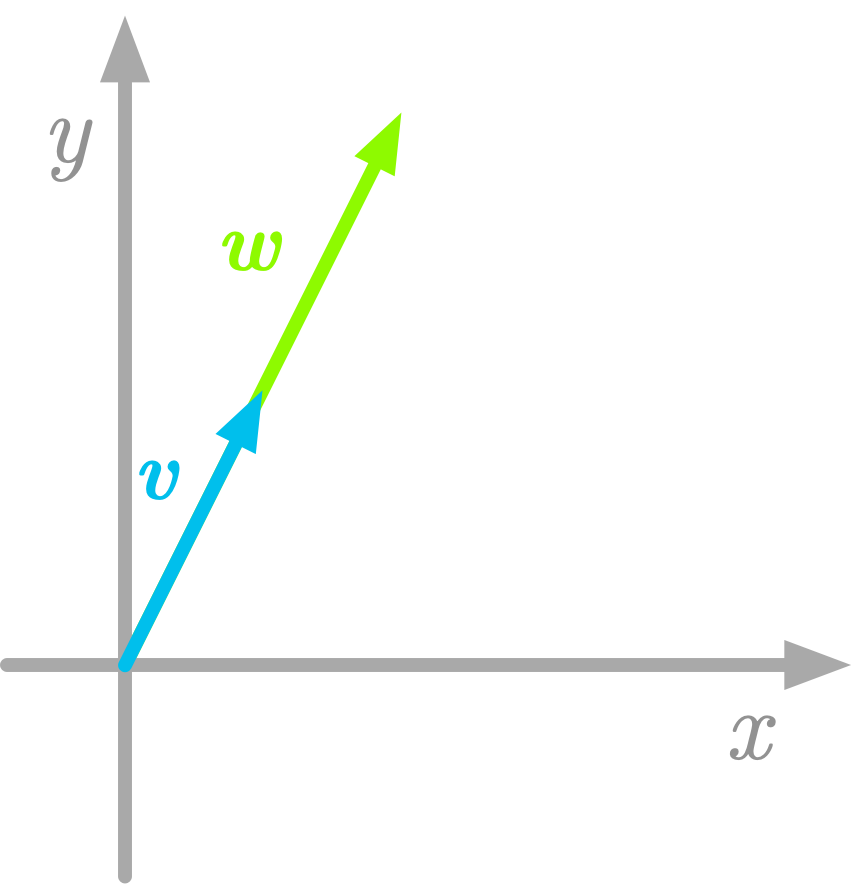<figcaption aria-hidden="true">Figure 132: The two vectors <span class="math inline">$\vv$</span> and <span class="math inline">$\vw$</span>.</figcaption>
</figure>

Let’s represent their span:

In [29]:

v = np.array([1, 2])
w = np.array([2, 4])

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

span_x = np.zeros(x.shape[0] * y.shape[0])
span_y = np.zeros(x.shape[0] * y.shape[0])

counter = 0
for vv in x:
    for ww in y:
        res = vv * v + ww * w
        span_x[counter] = res[0]
        span_y[counter] = res[1]
        
        counter += 1


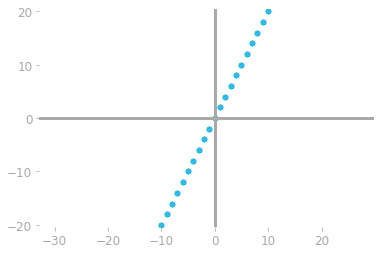

In [30]:

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

# draw axes
plt.axhline(0, c='#A9A9A9')
plt.axvline(0, c='#A9A9A9')

# assure x and y axis have the same scale
plt.axis('equal')


plt.scatter(span_x, span_y, s=20, alpha=0.5)
plt.ylim(-2, 2)
plt.show()


<figure>
<figcaption aria-hidden="true">Figure 133: The span of two vectors that have the same direction.</figcaption>
</figure>

For this last example, you can see that the span of $\vv$ and $\vw$ is a
line and not a plane.

